In [1]:
from collections import Counter

import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

from mgitools.os_helpers import listfiles

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import mip.utils as utils

#### merge adatas

In [5]:
sorted(listfiles('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/', regex=r'spatial_features.h5ad'))

['/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_4/spatial_features.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT323B1-H1A1/level_4/spatial_features.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT323B1-H1A4/level_4/spatial_features.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT323B1-H3/level_4/spatial_features.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT397B1-H2A2/level_4/spatial_features.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT397B1-H3A1/level_4/spatial_features.h5ad']

In [6]:
fps = [
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_4/spatial_features.h5ad',
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT323B1-H1A1/level_4/spatial_features.h5ad',
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT323B1-H1A4/level_4/spatial_features.h5ad',
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT323B1-H3/level_4/spatial_features.h5ad',
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT397B1-H2A2/level_4/spatial_features.h5ad',
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT397B1-H3A1/level_4/spatial_features.h5ad'
]

In [7]:
adatas = []
for fp in fps:
    sample = fp.split('/')[-3]
    a = sc.read_h5ad(fp)
    a.obs['sample_id'] = sample
    adatas.append(a)

In [8]:
markers = [s for a in adatas for s in a.var.index.to_list()]
Counter(markers).most_common()

[('DAPI', 6),
 ('CD31', 6),
 ('E-cadherin', 6),
 ('CD4', 6),
 ('CD20', 6),
 ('Ki67', 6),
 ('CD68', 6),
 ('Pan-CK', 6),
 ('CD8', 6),
 ('Histone H3 Pho', 6),
 ('CD163', 6),
 ('Podoplanin', 6),
 ('CD36', 6),
 ('HIF1a', 6),
 ('GLUT1', 6),
 ('GATA3', 6),
 ('CD45RO', 6),
 ('CD45RA', 6),
 ('SMA', 6),
 ('MGP', 6),
 ('Vimentin', 6),
 ('Maspin', 6),
 ('Foxp3', 6),
 ('MMP9', 6),
 ('HLA-DR', 6),
 ('CK14', 6),
 ('CD11c', 6),
 ('CD44', 6),
 ('CK19', 5),
 ('CD3e', 5),
 ('CK17', 5),
 ('beta-integrin', 3),
 ('beta3-integrin', 2),
 ('cKit', 2),
 ('COX2', 2),
 ('MLPH', 2),
 ('Lyve-1', 2),
 ('CD3', 1)]

In [9]:
m = {
    'CD3': ['CD3e'],
    'beta3-integrin': ['beta-integrin']
}
c2c = {v:k for k, vs in m.items() for v in vs}
for a in adatas:
    a.var.index = [c2c.get(x, x) for x in a.var.index]

In [10]:
annotation_marker_map = {
    'Endothelial': ['CD31'],
    'Epithelial': ['E-cadherin', 'Pan-CK'],
    'B cell': ['CD20'],
    'Macrophage': ['CD68', 'CD163'],
    'DC': ['CD11c'],
    'T cell': ['CD3', 'CD4', 'CD8', 'CD45RO'],
    'Fibroblast/Myo': ['Podoplanin', 'SMA', 'Vimentin'],
    'Proliferating': ['Ki67']
}
annotation_markers = [v for k, vs in annotation_marker_map.items() for v in vs]

In [11]:
filtered_adatas = []
for a in adatas:
    f = a[:, annotation_markers]
    filtered_adatas.append(f)
ph_adata = anndata.concat(filtered_adatas)
ph_adata

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 1113429 × 15
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD36 intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'CD44 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 intensity min', 'Ki67 intensity min', 'CD68 intensity m

In [12]:
sc.pp.log1p(ph_adata)

In [13]:
sc.pp.neighbors(ph_adata)
sc.tl.pca(ph_adata)

In [14]:
import scanpy.external as sce

In [15]:
sce.pp.harmony_integrate(ph_adata, 'sample_id')

2022-05-18 11:31:07,903 - harmonypy - INFO - Iteration 1 of 10
2022-05-18 11:44:03,270 - harmonypy - INFO - Iteration 2 of 10
2022-05-18 11:57:14,576 - harmonypy - INFO - Iteration 3 of 10
2022-05-18 12:10:23,928 - harmonypy - INFO - Iteration 4 of 10
2022-05-18 12:23:13,169 - harmonypy - INFO - Iteration 5 of 10
2022-05-18 12:36:26,358 - harmonypy - INFO - Iteration 6 of 10
2022-05-18 12:49:15,928 - harmonypy - INFO - Iteration 7 of 10
2022-05-18 13:02:06,501 - harmonypy - INFO - Iteration 8 of 10
2022-05-18 13:15:15,900 - harmonypy - INFO - Iteration 9 of 10
2022-05-18 13:28:22,918 - harmonypy - INFO - Iteration 10 of 10
2022-05-18 13:41:21,634 - harmonypy - INFO - Stopped before convergence


In [16]:
# sce.pp.bbknn(ph_adata, 'sample_id', )

In [17]:
from umap import UMAP
idxs = np.random.choice(np.arange(ph_adata.shape[0]), size=10000, replace=False)
X = ph_adata.obsm['X_pca'][idxs]
u = UMAP()
u.fit(X)
ph_adata.obsm['X_umap'] = u.fit_transform(ph_adata.obsm['X_pca'])

In [18]:
X = ph_adata.obsm['X_pca_harmony'][idxs]
u = UMAP()
u.fit(X)
ph_adata.obsm['X_umap_harmony'] = u.fit_transform(ph_adata.obsm['X_pca_harmony'])

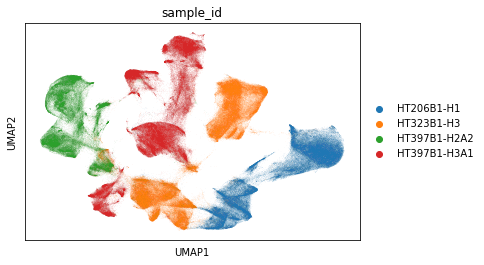

In [19]:
sc.pl.umap(ph_adata, color='sample_id')

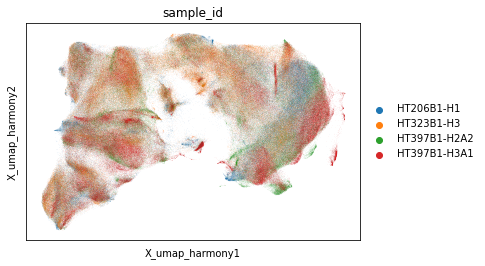

In [20]:
sc.pl.embedding(ph_adata, basis='X_umap_harmony', color='sample_id')

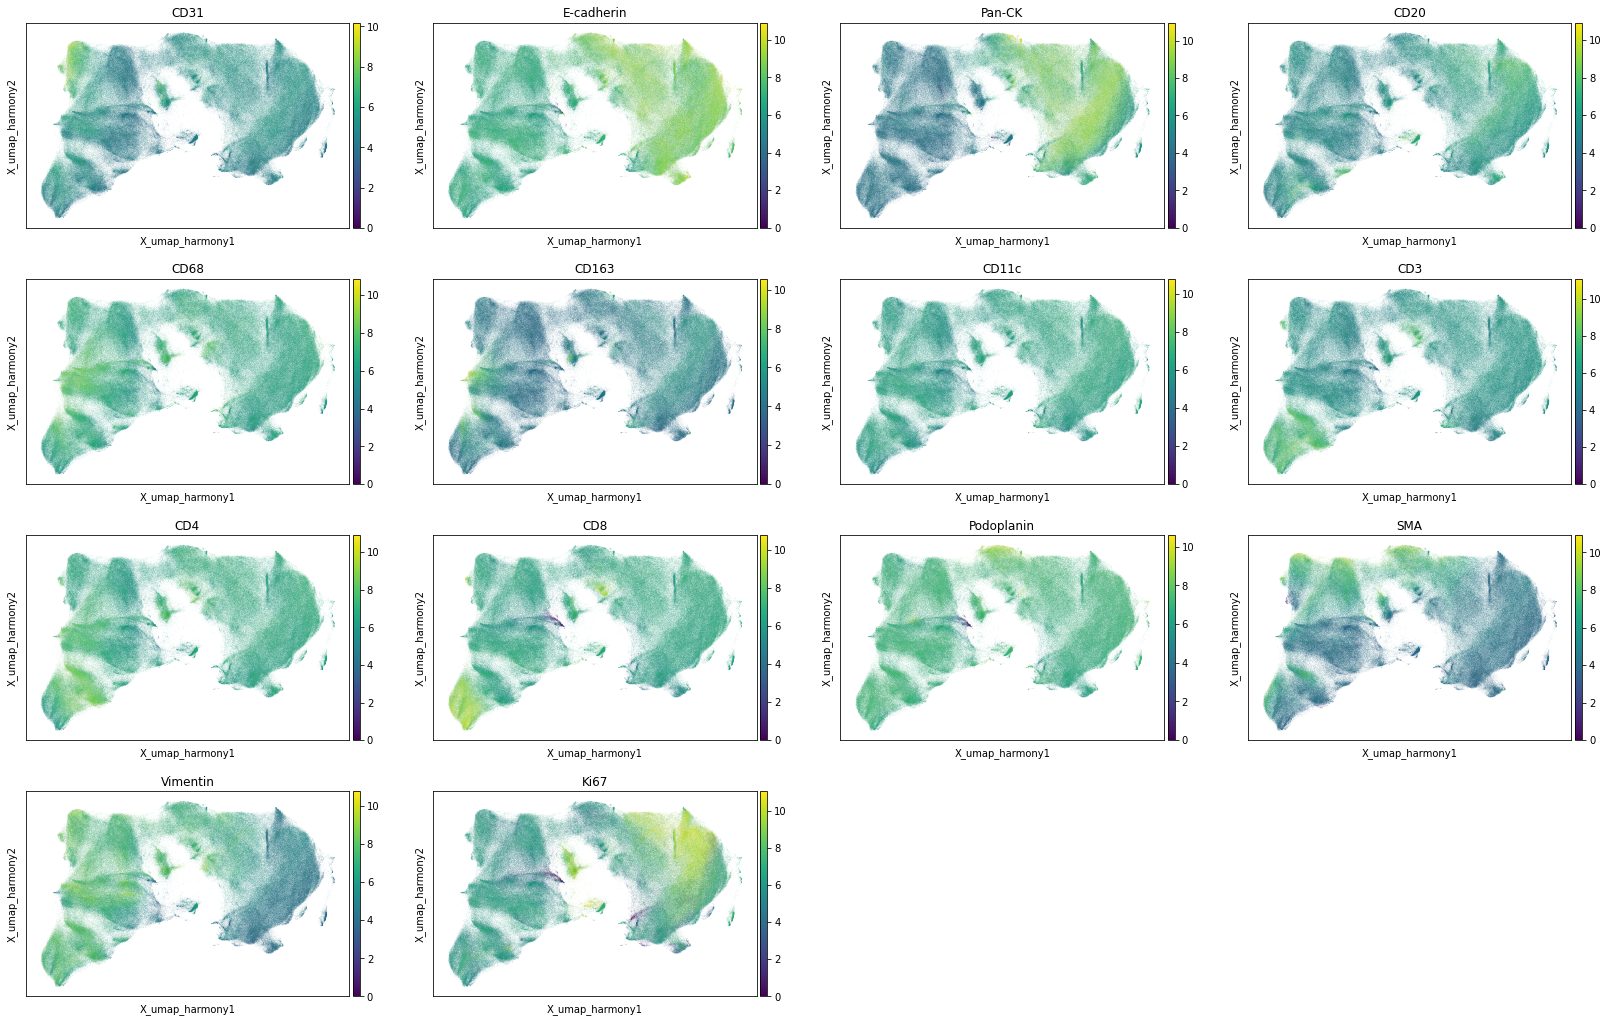

In [21]:
sc.pl.embedding(ph_adata, basis='X_umap_harmony', color=ph_adata.var.index.to_list())

In [22]:
ph_adata.write_h5ad('../../sandbox/htan_brca_integrated.h5ad')